## Assignment 2: K-Means Clustering

Course: **Data Mining and Analysis**  
Objective: **Apply K-means on selected database**  
Submitted by: **Shanoverali Saiyed** (C0882380)  
Submitted on: **17 June 2023**    
Submitted to: **Victoria Shtern**

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a Pandas dataframe

df = pd.read_csv(r'students.csv')
df.tail() # check if the dataset loaded correctly

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


# How big is this dataset?

In [3]:
df.shape

(4424, 37)

### 4424 rows, 37 columns: It is good enough for clustering

In [4]:
df.info() # To check each columns null count and data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [21]:
df.columns # Get only columns information

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
# Let's create two new features to based on 3 columns. 1 common and 2 uncommon.

df['ag_1stsem'] = df['Admission grade'] + df['Curricular units 1st sem (grade)']
df['ag_2ndsem'] = df['Admission grade'] + df['Curricular units 2nd sem (grade)']

In [7]:
# Assigning the x, y for readability. This will help in plotting

x = df['ag_1stsem']
y = df['ag_2ndsem']

In [8]:
x # Let's check integrity of the x

0       127.300000
1       156.500000
2       124.800000
3       133.028571
4       153.833333
           ...    
4419    135.800000
4420    131.000000
4421    164.412500
4422    167.600000
4423    163.666667
Name: ag_1stsem, Length: 4424, dtype: float64

In [18]:
y # Let's check integrity of the x

0       127.300000
1       156.166667
2       124.800000
3       132.000000
4       154.500000
           ...    
4419    134.866667
4420    130.000000
4421    163.000000
4422    165.800000
4423    165.000000
Name: ag_2ndsem, Length: 4424, dtype: float64

### Initial plotting using Scatterplot to check for distribution of the feature-points

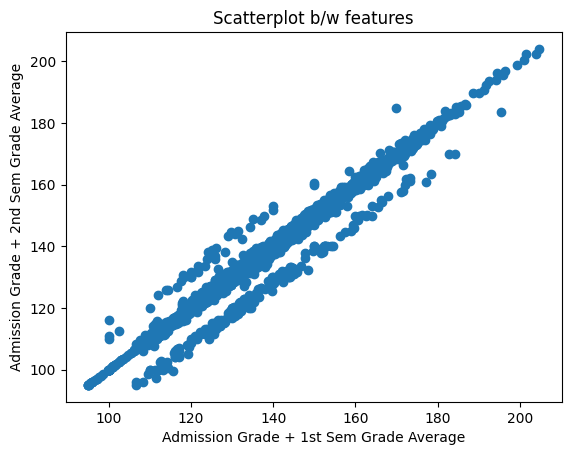

In [19]:
# import matplotlib.pyplot as plt import again if not already at the top

plt.scatter(x, y)
plt.title('Scatterplot b/w features')
plt.xlabel('Admission Grade + 1st Sem Grade Average')
plt.ylabel('Admission Grade + 2nd Sem Grade Average')

plt.show()

### Note: Using Admission Grade helped us to classify the data with meaning

If say we omitted the Admission grade from the new feature, which would make the two attributes back to 1st Sem Grade average and 2nd sem grade average. The min, max values of which goes from 0-20. To get the idea if at all, there is a connection between the admission grade and the semester average grades at all.

## K-Means:

C:\Users\Shanover\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


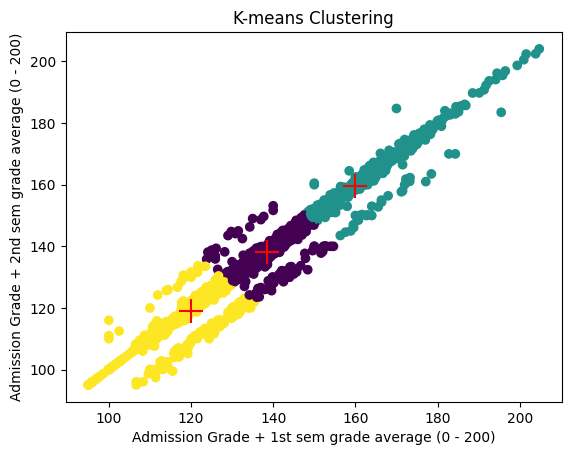

In [17]:
# x = DEFINED in Cell-7
# y = DEFINED in Cell-7

# Combine the features into a feature matrix
features = np.column_stack((x, y))

# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(x, y, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='red', s=300) # here s=300 represents the sizes of X marker
plt.xlabel('Admission Grade + 1st sem grade average (0 - 200)')
plt.ylabel('Admission Grade + 2nd sem grade average (0 - 200)')
plt.title('K-means Clustering')
plt.show()

## How to read this classification?

Cluster 1 (Yellow, Bottom left red dot centroid) : Represents students with low-admission-grade and low average in both semesters.

Cluster 2 (Dark, Middle. red dot centroid) : Represents students with medium-admission-grade and medium average in both semesters.

Cluster 3 (Green, Top right, red dot centroid) : Represents students with high-admission-grade and high average in both semesters. 

## Interpretation

- There is not much sparseness in this data as the values of Admission grades are between 0-200 and semester average (0-20)
- In the high cluster (cluster 3) the points with highest value tends to be further from centroid, whereas furthest points from the centroid in cluster 1 are lowest ones. (A good sign of classification)
- The middle cluster represents an evenly distributed points.

**Note:** Please refer to the PDF report submitted alongside for a better explanation and context

__________________________________________________________________________________________

This is the end of this notebook.  
Author: Shanoverali Saiyed